In [3]:
%reset -f

In [4]:
user = "HHegde"
db = f"/Users/{user}/.data/oaklib/phenio.db"

In [5]:
%reload_ext sql
%sql sqlite:///{db}

In [6]:
%sql SELECT * FROM term_association LIMIT 5;

 * sqlite:////Users/HHegde/.data/oaklib/phenio.db
Done.


id,subject,predicate,object,evidence_type,publication,source
uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations
uuid:70269c5c-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0001518,ECO:0000269,PMID:31675180,infores:hpo-annotations
uuid:70269c5d-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0032792,ECO:0000269,PMID:31675180,infores:hpo-annotations
uuid:70269c5e-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011451,ECO:0000269,PMID:31675180,infores:hpo-annotations


### Python

In [15]:
import sqlite3
import pandas as pd
import numpy as np
# Set the option to None to display all rows
# pd.set_option('display.max_rows', None)

from semsimian import Semsimian

In [8]:
conn = sqlite3.connect(db)
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = res.fetchall()

tables

[('term_association',),
 ('has_oio_synonym_statement',),
 ('anonymous_expression',),
 ('anonymous_class_expression',),
 ('anonymous_property_expression',),
 ('anonymous_individual_expression',),
 ('owl_restriction',),
 ('owl_complex_axiom',),
 ('prefix',),
 ('rdf_list_statement',),
 ('rdf_level_summary_statistic',),
 ('relation_graph_construct',),
 ('subgraph_query',),
 ('entailed_edge',),
 ('repair_action',),
 ('problem',),
 ('lexical_problem',),
 ('statements',)]

In [9]:
df_term_association = pd.read_sql_query("SELECT * FROM term_association", conn)
df_term_association.head()

,id,subject,predicate,object,evidence_type,publication,source
0,uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
1,uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations
2,uuid:70269c5c-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0001518,ECO:0000269,PMID:31675180,infores:hpo-annotations
3,uuid:70269c5d-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0032792,ECO:0000269,PMID:31675180,infores:hpo-annotations
4,uuid:70269c5e-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011451,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [10]:
df_term_association['subject'].str.split(":").str[0].unique()

array(['MONDO', 'HGNC', 'WB', 'MGI', 'RGD', 'Xenbase', 'ZFIN'],
      dtype=object)

In [24]:
df_term_association['object'].str.split(":").str[0].unique()

array(['HP', 'WBPhenotype', 'MP', 'XPO', 'ZP'], dtype=object)

In [11]:
df_term_association[df_term_association['subject'].str.startswith("MONDO:")]

,id,subject,predicate,object,evidence_type,publication,source
0,uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
1,uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations
2,uuid:70269c5c-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0001518,ECO:0000269,PMID:31675180,infores:hpo-annotations
3,uuid:70269c5d-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0032792,ECO:0000269,PMID:31675180,infores:hpo-annotations
4,uuid:70269c5e-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011451,ECO:0000269,PMID:31675180,infores:hpo-annotations
...,...,...,...,...,...,...,...
240650,uuid:7e6fe369-42a9-11ee-be37-31ef105c25ea,MONDO:0009033,biolink:has_phenotype,HP:0001831,ECO:0000304,orphanet:1777,infores:hpo-annotations
240651,uuid:7e6fe36a-42a9-11ee-be37-31ef105c25ea,MONDO:0009033,biolink:has_phenotype,HP:0002970,ECO:0000304,orphanet:1777,infores:hpo-annotations
240652,uuid:7e6fe36b-42a9-11ee-be37-31ef105c25ea,MONDO:0009033,biolink:has_phenotype,HP:0004209,ECO:0000304,orphanet:1777,infores:hpo-annotations
240653,uuid:7e6fe36c-42a9-11ee-be37-31ef105c25ea,MONDO:0009033,biolink:has_phenotype,HP:0005692,ECO:0000304,orphanet:1777,infores:hpo-annotations


In [13]:
condition_1 = df_term_association['subject'].str.startswith("MONDO:")
condition_2 = df_term_association['object'].str.startswith("HP:")

df = df_term_association[condition_1 & condition_2]

df.head()

,id,subject,predicate,object,evidence_type,publication,source
0,uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
1,uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations
2,uuid:70269c5c-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0001518,ECO:0000269,PMID:31675180,infores:hpo-annotations
3,uuid:70269c5d-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0032792,ECO:0000269,PMID:31675180,infores:hpo-annotations
4,uuid:70269c5e-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011451,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [48]:
# Set seed for random
np.random.seed(0)
random_hp_1 = np.random.choice(df['object'].unique(), size = 10, replace=False)
set(random_hp_1)

{'HP:0000042',
 'HP:0002453',
 'HP:0004233',
 'HP:0007041',
 'HP:0007734',
 'HP:0008523',
 'HP:0010037',
 'HP:0011193',
 'HP:0011787',
 'HP:0410275'}

In [61]:
# # Set seed for random
# np.random.seed(10)
# random_hp_2 = np.random.choice(df['object'].unique(), size = 10, replace=False)
# set(random_hp_2)

In [94]:
hp_1 = ["HP:0003394",
"HP:0003771",
"HP:0012378",
"HP:0012450",
"HP:0000974",
"HP:0001027",
"HP:0001030",
"HP:0001065",
"HP:0001073",
"HP:0001075",
"HP:0002761",
"HP:0001386",
"HP:0001537",
"HP:0001622",
"HP:0001760",
"HP:0001762",
"HP:0001763",
"HP:0001788",
"HP:0002035",
"HP:0002036",
"HP:0002616",
"HP:0002650",
"HP:0002758",
"HP:0002827",
"HP:0002829",
"HP:0002999",
"HP:0003010",
"HP:0003083",
"HP:0003834",
"HP:0000938",
"HP:0001058",
"HP:0001252",
"HP:0001324",
"HP:0002013",
"HP:0002018",
"HP:0002020",
"HP:0000015",
"HP:0000023",
"HP:0000139",
"HP:0000286",
"HP:0000481",
"HP:0000978",
"HP:0000993",
"HP:0001063",
"HP:0004872",
"HP:0004944",
"HP:0004947",
"HP:0001270",
"HP:0005294",
"HP:0006243",
"HP:0007495",
"HP:0009763",
"HP:0010749",
"HP:0010750",
"HP:0010754",
"HP:0025014",
"HP:0025019",
"HP:0025509",
"HP:0030009",
"HP:0031364",
"HP:0031653",
"HP:0001278",
"HP:0001634",
"HP:0001653",
"HP:0001704",
"HP:0002315"]

hp_2 = ["HP:0003645",
"HP:0005261",
"HP:0002758",
"HP:0003125",
"HP:0001892",
"HP:0001934",
"HP:0000967",
"HP:0000978",
"HP:0000979",
"HP:0040242",
"HP:0007420",
"HP:0030140",
"HP:0001386",
"HP:0002829",
"HP:0002239",
"HP:0011889",
"HP:0001907",
"HP:0012223",
"HP:0009811",
"HP:0012233",
"HP:0030746",
"HP:0002170"]

In [62]:
mondo = set(df['subject'].drop_duplicates())

In [95]:
%%time
predicates = ["rdfs:subClassOf","BFO:0000050", "UPHENO:0000001"]
rss = Semsimian(spo=None, predicates=predicates, pairwise_similarity_attributes=None, resource_path=db)
all_x_all = rss.all_by_all_pairwise_similarity(subject_terms=set(hp_1), object_terms=set(hp_2), minimum_jaccard_threshold=0, minimum_resnik_threshold=0)


CPU times: user 54.8 s, sys: 1.84 s, total: 56.6 s
Wall time: 56.9 s


In [96]:
%%time

rows_list = []
for term1_key, values in all_x_all.items():
    for term2_key, result in values.items():
        jaccard, resnik, phenodigm, _, _ = result
        row_dict = {"subject": term1_key, "object": term2_key, "jaccard": jaccard, "aic": resnik, "phenodigm": phenodigm}
        rows_list.append(row_dict)

new_df = pd.DataFrame(rows_list)

CPU times: user 49.1 ms, sys: 3.17 ms, total: 52.3 ms
Wall time: 52.1 ms


In [97]:
new_df_sorted = new_df.sort_values(by=["jaccard", "aic"], ascending=False).reset_index()
new_df_sorted.drop("index", axis=1, inplace=True)
new_df_sorted

,subject,object,jaccard,aic,phenodigm
0,HP:0000978,HP:0000978,1.000000,18.008877,4.243687
1,HP:0001386,HP:0001386,1.000000,18.008877,4.243687
2,HP:0002829,HP:0002829,1.000000,17.008877,4.124182
3,HP:0002758,HP:0002758,1.000000,14.838952,3.852136
4,HP:0031364,HP:0000967,0.975309,16.423915,4.002298
...,...,...,...,...,...
1447,HP:0003083,HP:0002239,0.116751,4.134184,0.694745
1448,HP:0006243,HP:0002829,0.112583,4.010992,0.671989
1449,HP:0006243,HP:0003125,0.111111,4.134184,0.677756
1450,HP:0003083,HP:0002829,0.106250,4.010992,0.652815


In [98]:
new_df_sorted['aic'].drop_duplicates()

0       18.008877
2       17.008877
3       14.838952
4       16.423915
5       15.686949
          ...    
1079     5.079804
1124     4.253051
1194     4.403398
1204     4.217714
1256     6.722319
Name: aic, Length: 63, dtype: float64

Text(0.5, 1.0, 'Top 10 Subjects vs Corresponding Objects')

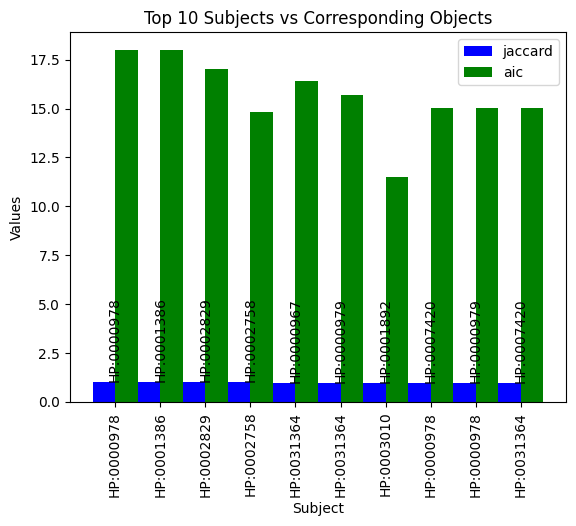

In [116]:
df_subset = new_df_sorted.head(10)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.5

# Get the positions of the bars
positions = list(range(len(df_subset)))

# Plot bars for 'jaccard' in one color
plt.bar([p - bar_width/2 for p in positions], df_subset['jaccard'], width=bar_width, color='blue', label='jaccard')

# Plot bars for 'aic' in another color
plt.bar([p + bar_width/2 for p in positions], df_subset['aic'], width=bar_width, color='green', label='aic')

# Set the x ticks with names
plt.xticks(positions, df_subset['subject'], rotation='vertical')

# Show object values on top of the bars
for i in range(len(df_subset)):
    plt.text(x = i, y = df_subset['jaccard'].iloc[i], s = df_subset['object'].iloc[i], size = 10, ha = 'center', va = 'bottom', rotation='vertical')


# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Subject')
plt.ylabel('Values')
plt.title('Top 10 Subjects vs Corresponding Objects')

In [117]:
df_subset

,subject,object,jaccard,aic,phenodigm
0,HP:0000978,HP:0000978,1.000000,18.008877,4.243687
1,HP:0001386,HP:0001386,1.000000,18.008877,4.243687
2,HP:0002829,HP:0002829,1.000000,17.008877,4.124182
3,HP:0002758,HP:0002758,1.000000,14.838952,3.852136
4,HP:0031364,HP:0000967,0.975309,16.423915,4.002298
5,HP:0031364,HP:0000979,0.975000,15.686949,3.910854
6,HP:0003010,HP:0001892,0.968750,11.485315,3.335626
7,HP:0000978,HP:0007420,0.962500,15.008877,3.800795
8,HP:0000978,HP:0000979,0.962500,15.008877,3.800795
9,HP:0031364,HP:0007420,0.950617,15.008877,3.777261
